In [ ]:
# Attempt to model the 15 bus route from Ballycullen to Clongriffen

Idea is to build simple linear models for both dwell time and travel time.

First we'll look at modelling a single link, then expand this to model a whole route.

Hopefully the output will be a module that can be added to dbanalysis.models

In [8]:
from dbanalysis import headers

In [9]:
hds=headers.get_route_headers()

In [10]:
hds


['index',
 'datasource',
 'dayofservice',
 'tripid',
 'progrnumber',
 'stoppointid',
 'plannedtime_arr',
 'plannedtime_dep',
 'actualtime_arr',
 'actualtime_dep',
 'vehicleid',
 'passengers',
 'passengersin',
 'passengersout',
 'distance',
 'suppressed',
 'justificationid',
 'lastupdate',
 'note']

In [1]:
import pandas as pd

In [11]:
df=pd.read_csv('/home/student/ResearchPracticum/data/routesplits/15_16', names=hds)

In [12]:
df.head()

,index,datasource,dayofservice,tripid,progrnumber,stoppointid,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,vehicleid,passengers,passengersin,passengersout,distance,suppressed,justificationid,lastupdate,note
0,276,DB,27-MAR-17 00:00:00,4535471,4,6320,60147,60147,60184,60204,2406908,NaN,NaN,NaN,NaN,NaN,NaN,09-APR-17 09:00:06,NaN
1,277,DB,27-MAR-17 00:00:00,4535471,9,1218,60491,60491,60533,60533,2406908,NaN,NaN,NaN,NaN,NaN,NaN,09-APR-17 09:00:06,NaN
2,278,DB,27-MAR-17 00:00:00,4535471,14,1275,60815,60815,60772,60790,2406908,NaN,NaN,NaN,NaN,NaN,NaN,09-APR-17 09:00:06,NaN
3,279,DB,27-MAR-17 00:00:00,4535471,19,1221,61049,61049,61093,61093,2406908,NaN,NaN,NaN,NaN,NaN,NaN,09-APR-17 09:00:06,NaN
4,280,DB,27-MAR-17 00:00:00,4535471,24,668,61333,61333,61265,61265,2406908,NaN,NaN,NaN,NaN,NaN,NaN,09-APR-17 09:00:06,NaN


In [13]:
df.sort_values(by=['tripid', 'dayofservice','actualtime_arr'])

,index,datasource,dayofservice,tripid,progrnumber,stoppointid,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,vehicleid,passengers,passengersin,passengersout,distance,suppressed,justificationid,lastupdate,note
455684,847268,DB,03-JAN-17 00:00:00,4094338,1,6318,79200,79200,79201,79201,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455686,847270,DB,03-JAN-17 00:00:00,4094338,2,6319,79228,79228,79225,79241,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455688,847272,DB,03-JAN-17 00:00:00,4094338,3,7246,79265,79265,79272,79272,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455690,847274,DB,03-JAN-17 00:00:00,4094338,4,6320,79342,79342,79364,79364,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455692,847276,DB,03-JAN-17 00:00:00,4094338,5,4594,79395,79395,79410,79427,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455694,847278,DB,03-JAN-17 00:00:00,4094338,6,4595,79476,79476,79494,79507,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455667,847251,DB,03-JAN-17 00:00:00,4094338,7,4596,79506,79506,79532,79532,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455669,847253,DB,03-JAN-17 00:00:00,4094338,8,4563,79556,79556,79565,79603,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455671,847255,DB,03-JAN-17 00:00:00,4094338,9,1218,79603,79603,79629,79629,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN
455673,847257,DB,03-JAN-17 00:00:00,4094338,10,1270,79658,79658,79668,79682,2693209,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-17 16:24:19,NaN


In [8]:
import os
print(sorted(os.listdir('/home/student/ResearchPracticum/data/routesplits')))


['102_10', '102_8', '102_9', '104_15', '104_16', '111_10', '111_7', '111_8', '111_9', '114_5', '114_6', '116_1', '116_3', '118_3', '11_40', '11_41', '11_42', '11_43', '120_10', '120_7', '120_8', '120_9', '122_14', '122_15', '122_16', '122_17', '123_34', '123_35', '123_36', '123_37', '130_10', '130_11', '13_28', '13_60', '13_61', '13_62', '13_63', '13_64', '13_65', '13_66', '13_67', '13_68', '13_69', '13_70', '13_71', '13_72', '13_73', '13_74', '13_75', '13_76', '140_16', '140_19', '140_20', '140_21', '140_22', '142_10', '142_12', '142_8', '142_9', '145_102', '145_104', '145_105', '145_106', '145_107', '145_86', '145_87', '145_88', '145_89', '145_91', '145_93', '145_94', '145_95', '145_99', '14C_17', '14C_18', '14_12', '14_15', '14_16', '150_5', '150_6', '150_7', '151_15', '151_16', '151_17', '151_18', '151_19', '15A_80', '15A_81', '15A_82', '15B_55', '15B_56', '15B_57', '15B_58', '15B_59', '15_10', '15_16', '15_17', '15_18', '161_50', '161_51', '161_52', '16C_26', '16C_27', '16C_28', '

In [9]:
routes_15 = ['15_10', '15_16', '15_17', '15_18']
import pandas as pd
from dbanalysis import route_tools
to_concat = []
for route in routes_15:
    to_concat.append(route_tools.get_munged_route_data(route))

Dropped 328 rows
Dropped 9.753196550698782 % of dataframe
Dropped 45330 rows
Dropped 8.207867457335565 % of dataframe
Dropped 52746 rows
Dropped 9.763221607694188 % of dataframe
Dropped 747 rows
Dropped 11.045394055892356 % of dataframe


In [10]:
all_stops.shape

(1003502, 9)

In [11]:
a=all_stops
a[a['actualtime_arr_from']==a['actualtime_dep_from']]

,dayofservice,fromstop,tostop,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to
0,03-JAN-17 00:00:00,6318,6319,84000,84000,84016,84016,84026,84032
1,03-JAN-17 00:00:00,6319,7246,84026,84026,84032,84032,84056,84055
2,03-JAN-17 00:00:00,7246,6320,84056,84056,84055,84055,84118,84123
3,03-JAN-17 00:00:00,6320,4594,84118,84118,84123,84123,84173,84171
4,03-JAN-17 00:00:00,4594,4595,84173,84173,84171,84171,84257,84224
8,03-JAN-17 00:00:00,1218,1270,84370,84370,84383,84383,84418,84418
9,03-JAN-17 00:00:00,1270,1272,84418,84418,84418,84418,84454,84449
10,03-JAN-17 00:00:00,1272,1273,84454,84454,84449,84449,84489,84466
11,03-JAN-17 00:00:00,1273,1274,84489,84489,84466,84466,84524,84487
13,03-JAN-17 00:00:00,1275,1276,84575,84575,84533,84533,84593,84546


In [12]:
all_stops.columns

Index(['dayofservice', 'fromstop', 'tostop', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to'],
      dtype='object')

In [13]:
all_stops[all_stops['actualtime_arr_from']!=all_stops['actualtime_dep_from']].shape

(629054, 9)

In [14]:
all_stops['fromstop'].unique()

array([6318, 6319, 7246, 6320, 4594, 4595, 4596, 4563, 1218, 1270, 1272,
       1273, 1274, 1275, 1276, 1277, 1219, 1220, 1221,  664,  665,  666,
        667,  668,  614,  615,  616,  617,  618,  619,  675, 4415, 4495,
        301, 7581, 1283, 7579, 1285, 1016, 1017, 1018, 1019, 1020, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1121, 1122, 1123,
       1124, 1125, 1127, 1130, 1140, 1141, 1142, 1143, 1144, 1145, 4869,
       4870, 3007, 6283, 6282, 6335, 6326, 4886, 4887, 1150, 1151, 1152,
       1153, 1154,  946, 1155, 1157, 1158, 1159, 1160, 1161, 1162, 1163,
       1164, 1165, 1166, 1167, 1168, 1169, 1170, 1069, 1070, 1071, 4528,
       1072, 7577, 1353, 7578, 7582,  299,  497,  515,  516, 4384,  519,
        521,  522,  523,  669,  670,  671,  672, 4382, 1196, 1197, 1198,
       1199, 1200, 4385, 1201, 1202, 1203, 6115, 4593, 7516, 6079, 6315,
       6316, 7236, 7245, 1354])

### Looking at just one stop

In [15]:
stop=all_stops[all_stops['fromstop']==7582]

In [16]:
stop['tostop'].unique()

array([299])

In [17]:
stop.shape

(7779, 9)

In [18]:
stop.head(40)

,dayofservice,fromstop,tostop,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to
34,03-JAN-17 00:00:00,7582,299,75724,75724,74981,75086,76182,75263
100,04-JAN-17 00:00:00,7582,299,75724,75724,75354,75382,76182,75633
166,05-JAN-17 00:00:00,7582,299,75724,75724,75396,75465,76182,75678
232,06-JAN-17 00:00:00,7582,299,75724,75724,75175,75214,76182,75343
298,09-JAN-17 00:00:00,7582,299,75724,75724,74931,74998,76182,75190
364,10-JAN-17 00:00:00,7582,299,75724,75724,75239,75312,76182,75521
430,13-JAN-17 00:00:00,7582,299,75724,75724,75570,75611,76182,75972
496,16-JAN-17 00:00:00,7582,299,75724,75724,74790,74813,76182,75021
562,17-JAN-17 00:00:00,7582,299,75724,75724,75156,75179,76182,75403
628,18-JAN-17 00:00:00,7582,299,75724,75724,75009,75023,76182,75224


In [19]:
stop['traveltime']=stop['actualtime_arr_to']-stop['actualtime_dep_from']

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
stop['dwelltime']=stop['actualtime_dep_from']-stop['actualtime_arr_from']

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
print("Mean travel time on this link:", stop['traveltime'].mean())
print('Mean dwell time on this link:',stop['dwelltime'].mean())

Mean travel time on this link: 320.66139606633243
Mean dwell time on this link: 48.85756523974804


In [22]:
print('Mean lateness on this link:',(stop['actualtime_arr_to']-stop['plannedtime_arr_to']).mean())

Mean lateness on this link: -67.5490422933539


Interesting! The busses seem to run early on this link. Going by Dublin Bus's 'planned' schedule though, of course.

## Building a travel time model for one connection

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np



### Making time series data numerical

In [24]:
datetimes=pd.to_datetime(stop['dayofservice'])

In [25]:
stop['dt']=datetimes

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
stop['dt'].head()

34    2017-01-03
100   2017-01-04
166   2017-01-05
232   2017-01-06
298   2017-01-09
Name: dt, dtype: datetime64[ns]

In [27]:
stop['dayofweek']=stop['dt'].dt.dayofweek
stop['month']=stop['dt'].dt.month

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
stop.head()

,dayofservice,fromstop,tostop,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,traveltime,dwelltime,dt,dayofweek,month
34,03-JAN-17 00:00:00,7582,299,75724,75724,74981,75086,76182,75263,177,105,2017-01-03,1,1
100,04-JAN-17 00:00:00,7582,299,75724,75724,75354,75382,76182,75633,251,28,2017-01-04,2,1
166,05-JAN-17 00:00:00,7582,299,75724,75724,75396,75465,76182,75678,213,69,2017-01-05,3,1
232,06-JAN-17 00:00:00,7582,299,75724,75724,75175,75214,76182,75343,129,39,2017-01-06,4,1
298,09-JAN-17 00:00:00,7582,299,75724,75724,74931,74998,76182,75190,192,67,2017-01-09,0,1


In [29]:
stop['target'] = stop['actualtime_arr_to'] - stop['actualtime_dep_from']

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
cols = [col for col in stop.columns if col not in ['dayofservice','actualtime_arr_to','dt','target','traveltime']]

In [31]:
msk = np.random.rand(len(stop)) < 0.8
train = stop[msk]
test = stop[~msk]

In [32]:
regr = LinearRegression(fit_intercept=True).fit(train[cols],train['target'])

In [33]:
preds=regr.predict(test[cols])
truths = test['target']
preds = [float(x) for x in preds]
truths = [float(x) for x in truths]
len(truths)

1589

In [34]:
preds[4] - truths[4]

171.58841312296784

In [35]:
total = 0
for i in range(0, len(preds)):
    total += (preds[i]-truths[i])
print(int(total/len(preds)))
    
    

2


In [36]:
dir(regr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

On average, we're off by about six seconds -- not so bad really -- though we did include information about the dwell time, which might also (somehow) encode information about the route

## Ok so it makes predictions! 

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(truths,preds)

24916.347704466083

Over all, this seems to be a very very bad mean_squared_error, though I don't really get it so I don't know.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
regr =RandomForestRegressor().fit(train[cols],train['target'])

In [40]:
regr.predict(test[cols])

array([281.1, 192.2, 322.7, ..., 304.5, 269.3, 211.4])

In [41]:
preds=regr.predict(test[cols])
truths = test['target']
preds = [float(x) for x in preds]
truths = [float(x) for x in truths]
mean_squared_error(truths,preds)

22200.577337948394

That still seems somewhat.... awful. Must be doing something wrong!

In [42]:
import json

what about adding columns for weekend, and turning time into a polynomial (cubic, in order to allow for fitting to two peak times?)

In [43]:
stop['weekend'] = stop['dayofweek']>4

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
stop['weekend'].mean()

0.11801002699575781

In [45]:
stop['dep2']=stop['actualtime_dep_from']**2
stop['dep3']=stop['actualtime_dep_from']**3

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
msk = np.random.rand(len(stop)) < 0.8
train = stop[msk]
test = stop[~msk]

In [47]:
regr = LinearRegression(fit_intercept=True).fit(train[cols],train['target'])

In [48]:
preds=regr.predict(test[cols])
truths = test['target']
preds = [float(x) for x in preds]
truths = [float(x) for x in truths]
len(truths)

1576

In [49]:
preds[4] - truths[4]

-86.71234893798828

In [50]:
total = 0
for i in range(0, len(preds)):
    total += (preds[i]-truths[i])
print(int(total/len(preds)))
    
    

-5


Well this looks better .... But is it?

In [51]:
mean_squared_error(truths,preds)

21582.99325283959

In [52]:
d=json.loads(open('stops_trimmed.json','r').read())

In [53]:
d

{'7612': {'stop_name': 'Davenport Hotel Merrion Street',
  'lat': 53.3413467794909,
  'lon': -6.250529480367451},
 '2': {'stop_name': 'Rotunda, Parnell Square West',
  'lat': 53.3522443611383,
  'lon': -6.26372321891887},
 '3': {'stop_name': 'Rotunda, Granby Place',
  'lat': 53.35230855143251,
  'lon': -6.26381074216825},
 '4': {'stop_name': 'Rotunda, Rotunda Hospital',
  'lat': 53.352574513185,
  'lon': -6.26417548603797},
 '6': {'stop_name': "Rotunda, Saint Martin's Chapel",
  'lat': 53.3527493357046,
  'lon': -6.264453803964339},
 '7': {'stop_name': 'Rotunda, Rotunda Hospital',
  'lat': 53.352840910578394,
  'lon': -6.26457026121749},
 '8': {'stop_name': 'Rotunda, Parnell Square West',
  'lat': 53.3532722714822,
  'lon': -6.265183676574},
 '10': {'stop_name': 'Rotunda, Parnell Square West',
  'lat': 53.3533921036473,
  'lon': -6.265389123899539},
 '11': {'stop_name': "Phibsborough, Upper Dorset St (St.Joseph's Parade)",
  'lat': 53.3569583030018,
  'lon': -6.264628310669281},
 '12':

In [54]:
import seaborn as sns

In [55]:
s = stop.sort_values(axis=0, by='actualtime_arr_from')

### Visualing dwell time and travel time by time of day

In [56]:
X=s['actualtime_arr_from']
Y=s['target']
Z=s['dwelltime']

In [57]:
import matplotlib.pyplot as plt

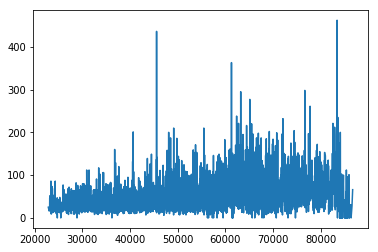

In [58]:
plt.plot(X,Z)
plt.show()

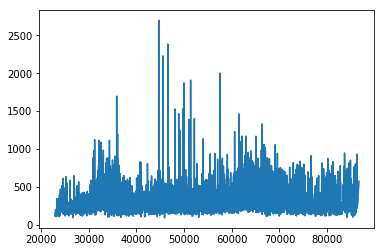

In [59]:
plt.plot(X,Y)
plt.show()

### By day of week

In [60]:
s = stop.sort_values(axis=0, by='dayofweek')

In [61]:
s['weekseconds']=(s['dayofweek']*(60*60*24))+s['actualtime_arr_from']


In [62]:
s = s.sort_values(axis=0, by='weekseconds')

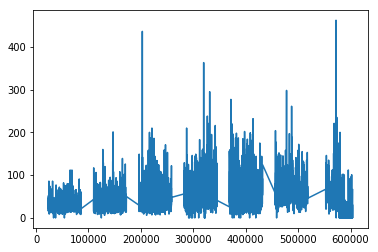

In [63]:
q=s['weekseconds']
plt.plot(q,Z)
plt.show()

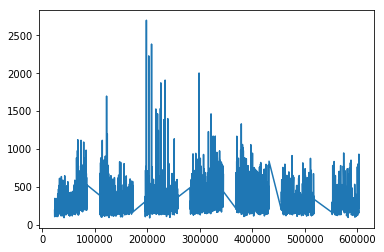

In [64]:
plt.plot(q,Y)
plt.show()

### This has been pretty useless to be honest!

In [65]:
print('hello')

hello


# Looking at the distributions of dwell time and travel time

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


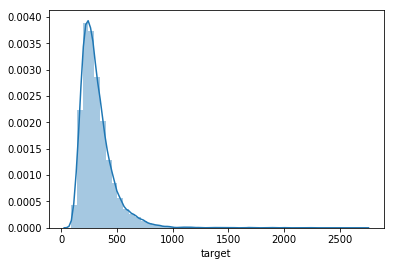

In [66]:
ax = sns.distplot(Y)

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


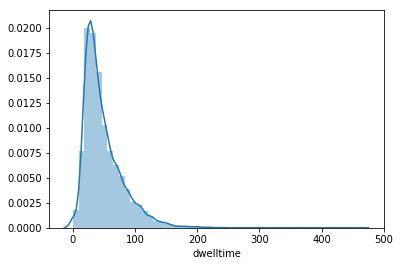

In [67]:
ax = sns.distplot(Z)

Are these normal(ish) distributions?

### Actual 'lateness' seems to roughly adhere to a normal distribution

In [68]:
A = s['plannedtime_arr_to'] - s['actualtime_arr_to']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


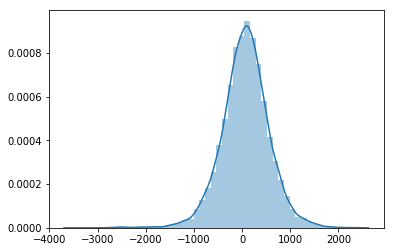

In [69]:
ax = sns.distplot(A)

# What about for the whole route?

In [70]:
df = all_stops

In [71]:
df.columns

Index(['dayofservice', 'fromstop', 'tostop', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to'],
      dtype='object')

In [72]:
df['traveltime']=df['actualtime_arr_to']-df['actualtime_dep_from']
df['dwelltime']=df['actualtime_dep_from']-df['actualtime_arr_from']
df['lateness']=df['actualtime_arr_to']-df['plannedtime_arr_to']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


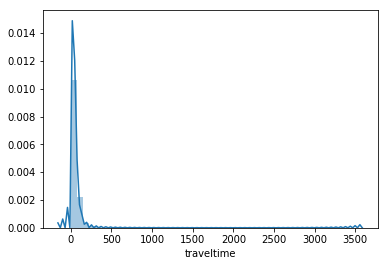

In [73]:
ax = sns.distplot(df['traveltime'])

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


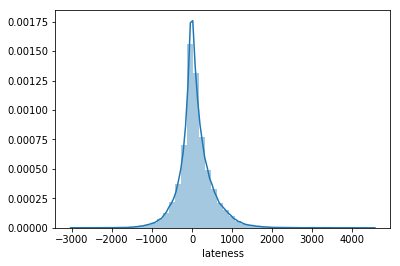

In [74]:
ax = sns.distplot(df['lateness'])

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


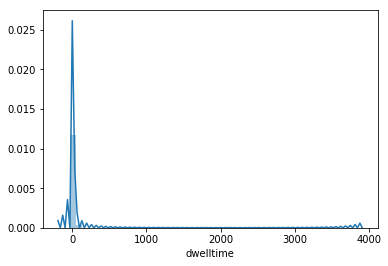

In [75]:
ax = sns.distplot(df['dwelltime'])

Well - this shows us that there are some crazy outliers in our dataset, whether that's important or not I don't know

Some busses spend up to an hour in 'dwell time'. That must suck

Modelling a whole route!

In [76]:
rts=json.loads(open('trimmed_routes.json','r').read())

In [77]:
print('hello')

hello


## We're going to model the 'to Ballycullen' variant

In [78]:
route=rts['15'][1]
print(route)

[' Ballycullen Road', 6318, 6319, 7246, 6320, 4594, 4595, 4596, 4563, 1218, 1270, 1272, 1273, 1274, 1275, 1276, 1277, 1219, 1220, 1221, 664, 665, 666, 667, 668, 614, 615, 616, 617, 618, 619, 675, 4415, 301, 4495, 7581, 1283, 7579, 1285, 1016, 1017, 1018, 1019, 1020, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1121, 1122, 1123, 1124, 1125, 1127, 1130, 1140, 1141, 1142, 1143, 1144, 1145, 4869, 4870, 3007, 6283, 6282]


What times do busses leave this stop?

In [79]:
all_stops[all_stops['fromstop']==6318]['plannedtime_dep_from'].nunique()

121

In [80]:
print('hello')

hello


In [81]:
all_stops.columns

Index(['dayofservice', 'fromstop', 'tostop', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'traveltime', 'dwelltime',
       'lateness'],
      dtype='object')

In [82]:
time_format = "%d-%b-%y %H:%M:%S"

In [83]:
datetimes = pd.to_datetime(all_stops['dayofservice'],format=time_format)

In [84]:
all_stops['dt']=datetimes
all_stops['dayofweek']=all_stops['dt'].dt.dayofweek
all_stops['month']=all_stops['dt'].dt.month
all_stops['weekend']=all_stops['dayofweek']>4

In [85]:
all_stops.head()

,dayofservice,fromstop,tostop,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,traveltime,dwelltime,lateness,dt,dayofweek,month,weekend
0,03-JAN-17 00:00:00,6318,6319,84000,84000,84016,84016,84026,84032,16,0,6,2017-01-03,1,1,False
1,03-JAN-17 00:00:00,6319,7246,84026,84026,84032,84032,84056,84055,23,0,-1,2017-01-03,1,1,False
2,03-JAN-17 00:00:00,7246,6320,84056,84056,84055,84055,84118,84123,68,0,5,2017-01-03,1,1,False
3,03-JAN-17 00:00:00,6320,4594,84118,84118,84123,84123,84173,84171,48,0,-2,2017-01-03,1,1,False
4,03-JAN-17 00:00:00,4594,4595,84173,84173,84171,84171,84257,84224,53,0,-33,2017-01-03,1,1,False


In [86]:
d['6282']

{'stop_name': "Ballycullen Road (Hunter's Avenue)",
 'lat': 53.271636070453205,
 'lon': -6.32896078879628}

Simple class contains two linear regression models - one for dwell time and one for travel time

In [128]:
class stop_link_model():
    """
    Simple class contains two linear regression models - one for dwell time and one for travel time.
    
    """
    
    def __init__(self,from_stop,to_stop,data,stop_data):
        self.from_stop = from_stop
        self.to_stop = to_stop
        self.data = data
        self.lat = stop_data['lat']
        self.lng = stop_data['lon']
        self.name = stop_data['stop_name']
        self.buildDwellTimeModel()
        self.buildTravelModel()
    def buildDwellTimeModel(self):
        target = 'dwelltime'
        features = ['actualtime_arr_from','actualtime_arr_from2','actualtime_arr_from3','dayofweek','month','weekend']
        self.dwell_regr = LinearRegression(fit_intercept=True).fit(self.data[features],self.data[target])
    def buildTravelModel(self):
        target= 'traveltime'
        features = ['actualtime_dep_from','actualtime_dep_from2','actualtime_dep_from3','dayofweek','month','weekend']
        self.travel_regr=LinearRegression(fit_intercept=True).fit(self.data[features],self.data[target])
    
    def get_time_to_next_stop(self, arrival_time, dayofweek,month,weekend):
        index1 = ['actualtime_arr_from','actualtime_arr_from2','actualtime_arr_from3','dayofweek','month','weekend']
        index2 = ['actualtime_dep_from','actualtime_dep_from2','actualtime_dep_from3''dayofweek','month','weekend']
        row = pd.DataFrame([[arrival_time,arrival_time**2,arrival_time**3,dayofweek,month,weekend]],index=index1)
        dwell_time = self.dwell_regr.predict(row)[0]
        row2 = pd.DataFrame([[dwell_time+arrival_time,(dwell_time+arrival_time)**2,(dwell_time+arrival_time)**3,dayofweek,month,weekend]],index=index2)
        travel_time = self.travel_regr.predict(row2)[0]
        return dwell_time + travel_time
        

### Build models for every stop in the route

In [129]:
all_stops['actualtime_arr_from2']=all_stops['actualtime_arr_from']**2
all_stops['actualtime_arr_from3']=all_stops['actualtime_arr_from']**3
all_stops['actualtime_dep_from2']=all_stops['actualtime_dep_from']**2
all_stops['actualtime_dep_from3']=all_stops['actualtime_dep_from']**3

In [130]:
models=[]
for i in range(1, len(route)-1):
    fromstop = route[i]
    tostop = route[i+1]
    data = all_stops[(all_stops['fromstop']==fromstop) & (all_stops['tostop']==tostop)]
    stop_data = d[str(fromstop)]
    models.append(stop_link_model(fromstop,tostop,data,stop_data))

In [131]:
models[15].get_time_to_next_stop(28800,2,3,True)

51.54096607928007

## Now we can send a bus down the route, starting at 10 o clock in the morning :O

In [132]:
total_time = 30000
for model in models:
    total_time += model.get_time_to_next_stop(total_time,2,3,False)
print(total_time)

35041.02978885355


In [120]:
models[2].dwell_regr.coef_

array([-1.46504532e-04, -1.13115803e-01,  3.66357520e-01,  6.26587670e+00])

In [134]:
models[0].name

'Clongriffin, Main Street'

It took just an hour and a bit to traverse this route - which must be somwhat... unrealistic right? Like maybe if the traffic was.... incredible? I think you would struggle to drive around the m50 in that kind of time frame。。。 

### Overall, I think this is a success. We can get more granular historical data, of course, by also including the other routes that share this link. But for now I think this is enough. 

There are probably better options than linear models, and it would be good to bring more sources of data into the equation. However, for now at least, I think this is grand.